## Instalaciones

In [1]:
# !pip install sdv
# !pip install copulas
# !pip install seaborn
# !pip install pandas
# !pip install seaborn
# !pip install pycaret

## Previo

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [2]:
os.path.abspath("..") in sys.path

True

In [3]:
from funciones import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *
from copulas.visualization import compare_3d
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer, TVAESynthesizer, CopulaGANSynthesizer
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality, get_column_plot
pd.set_option('display.max_columns', None)
# matplotlib.rcParams["font.family"] = "DejaVu Sans"

## Primer Análisis

In [4]:
DataPrincipal = pd.read_csv("../data/ParkinsonData.csv")

In [5]:
DataPrincipal

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
DataPrincipal.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
DataPrincipal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
DataPrincipal.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<Figure size 800x500 with 0 Axes>

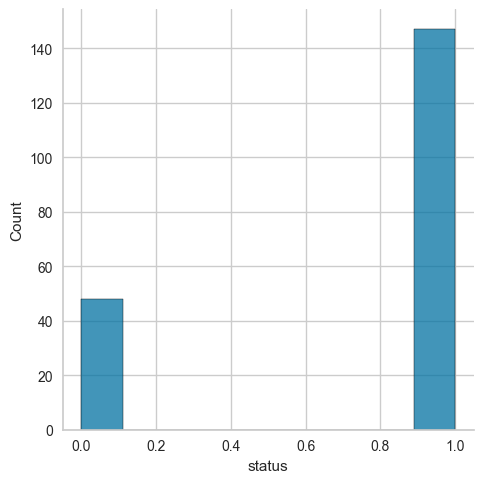

In [9]:
plt.figure(figsize = (8,5))
sns.displot(x = DataPrincipal["status"], kde = False)

In [10]:
print("Número de pacientes con Parkinson:", DataPrincipal[DataPrincipal["status"] == 1]["status"].count())
print("Número de pacientes sin Parkinson:", DataPrincipal[DataPrincipal["status"] == 0]["status"].count())

Número de pacientes con Parkinson: 147
Número de pacientes sin Parkinson: 48


Como vemos, tenemos una notable diferencia entre el número de pacientes con Parkinson y los que no, hay varias maneras de solucionar esto pero yo he elegido crear datos sintéticos a partir de los datos de sujetos sin Parkinson hasta que llegue al número de sujetos con Parkinson.

**Vamos a eliminar unos registros aleatorios de sujetos enfermos hasta dejarlos en 120 para que el número de datos sintéticos de sujetos sanos no supere el 61%.**

## Tratamiento de datos

In [11]:
DataPrincipal

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [12]:
print(len(DataPrincipal[DataPrincipal["status"] == 1]) - 120)

27


In [13]:
for i in range(27):
  DataPrincipal.drop(index = np.random.choice(DataPrincipal[DataPrincipal["status"] == 1].index), inplace = True)
DataPrincipal.reset_index(drop = True, inplace = True)

In [14]:
print("Número de pacientes con Parkinson:", DataPrincipal[DataPrincipal["status"] == 1]["status"].count())
print("Número de pacientes sin Parkinson:", DataPrincipal[DataPrincipal["status"] == 0]["status"].count())

Número de pacientes con Parkinson: 120
Número de pacientes sin Parkinson: 48


**Ahora debemos generar los datos sintéticos.**

Cómo queremos datos sintéticos solo de los pacientes sanos, pero también queremos que los campos parámetros sean distintos entre los pacientes sanos y enfermos debemos crear datos sintéticos de todos los registros tanto sanos como enfermos y luego solo seleccionar los pacientes enfermos. El campo name se va a quedar para ahorrarnos el trabajo de crear nuevos valores inventados para este campo y poder seguir identificando cada uno de los registros.

## Primeros Modelos

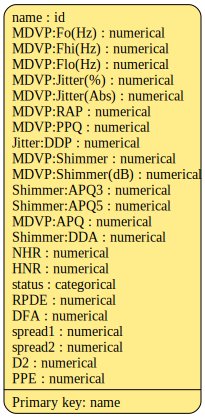

In [15]:
Metadata = SingleTableMetadata()
Metadata.detect_from_dataframe(DataPrincipal)
Metadata.visualize()

>Como vemos el campo name es de tipo id por lo que no se va a comprobar la relación que tiene con los otros campos para crear los datos sintéticos ya que es solo un identificador.

In [16]:
Metadata.validate_data(data=DataPrincipal)

### CTGAN Synthesizer

In [17]:
# synthesizer = CTGANSynthesizer(Metadata, verbose = True)
# synthesizer.fit(DataPrincipal)

In [18]:
# Guardar(synthesizer, "CTGANSynthesizer")
synthesizer = Abrir("CTGANSynthesizer")

In [19]:
120 - 48

72

Crearemos más del doble de datos sintéticos de los que necesitamos porque solo necesitaremos los datos sintéticos de pacientes sanos.

In [20]:
DataSintetico = synthesizer.sample(num_rows=150)
DataSintetico.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,sdv-id-zuxDPN,88.333,211.279,65.476,0.00442,0.000007,0.00144,0.00092,0.00783,0.02786,0.150,0.00468,0.01284,0.00719,0.01403,0.00065,15.662,0,0.483814,0.767960,-5.822502,0.326695,2.131324,0.155611
1,sdv-id-DnvTVt,168.824,351.971,101.177,0.01243,0.000007,0.00068,0.00139,0.00264,0.07966,0.085,0.00468,0.01106,0.01575,0.02882,0.00065,22.346,1,0.267152,0.681699,-7.964984,0.166208,2.155875,0.469015
2,sdv-id-MYuvdB,171.784,144.344,65.476,0.00168,0.000007,0.00068,0.00092,0.00204,0.03137,0.085,0.01917,0.01542,0.01181,0.03783,0.00065,17.479,1,0.360205,0.621986,-7.277859,0.211348,2.145400,0.348526
3,sdv-id-bREQUx,110.978,248.322,65.476,0.00425,0.000007,0.01893,0.00092,0.00204,0.02990,0.607,0.01593,0.03982,0.02363,0.01403,0.00065,17.981,1,0.560700,0.600643,-7.571555,0.205178,2.401933,0.306451
4,sdv-id-epIuZf,103.548,108.254,66.616,0.00747,0.000007,0.00187,0.00092,0.00607,0.01427,0.190,0.04930,0.02117,0.02569,0.01403,0.02284,23.944,0,0.639650,0.744888,-5.564502,0.184783,2.519562,0.107431


In [21]:
Diagnostico = run_diagnostic(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    metadata=Metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 24/24 [00:00<00:00, 2395.78it/s]|
Data Validity Score: 98.36%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 500.81it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.18%



**Nuestros datos sintéticos siguen el mismo formato que los orignales**

In [22]:
Calidad = evaluate_quality(
    DataPrincipal,
    DataSintetico,
    Metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 2179.80it/s]|
Column Shapes Score: 67.94%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:01<00:00, 246.31it/s]|
Column Pair Trends Score: 74.38%

Overall Score (Average): 71.16%



**Nuestros datos sintéticos tienen una similaridad del 69.43% con respecto a nuestros datos originales.**

In [23]:
Calidad.get_details('Column Shapes')

,Column,Metric,Score
0,MDVP:Fo(Hz),KSComplement,0.464762
1,MDVP:Fhi(Hz),KSComplement,0.814286
2,MDVP:Flo(Hz),KSComplement,0.658333
3,MDVP:Jitter(%),KSComplement,0.596429
4,MDVP:Jitter(Abs),KSComplement,0.179286
5,MDVP:RAP,KSComplement,0.512619
6,MDVP:PPQ,KSComplement,0.481667
7,Jitter:DDP,KSComplement,0.623095
8,MDVP:Shimmer,KSComplement,0.684286
9,MDVP:Shimmer(dB),KSComplement,0.822619


In [24]:
Calidad.get_details('Column Pair Trends')

,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation
0,MDVP:Fo(Hz),MDVP:Fhi(Hz),CorrelationSimilarity,0.816472,0.402561,0.035506
1,MDVP:Fo(Hz),MDVP:Flo(Hz),CorrelationSimilarity,0.765166,0.606565,0.136897
2,MDVP:Fo(Hz),MDVP:Jitter(%),CorrelationSimilarity,0.886465,-0.122708,0.104361
3,MDVP:Fo(Hz),MDVP:Jitter(Abs),CorrelationSimilarity,0.845966,-0.396558,-0.088489
4,MDVP:Fo(Hz),MDVP:RAP,CorrelationSimilarity,0.896965,-0.079305,0.126764
...,...,...,...,...,...,...
248,spread1,D2,CorrelationSimilarity,0.705327,0.519157,-0.070190
249,spread1,PPE,CorrelationSimilarity,0.537839,0.958759,0.034437
250,spread2,D2,CorrelationSimilarity,0.697245,0.512482,-0.093028
251,spread2,PPE,CorrelationSimilarity,0.732181,0.655549,0.119910


<Axes: xlabel='Score', ylabel='Count'>

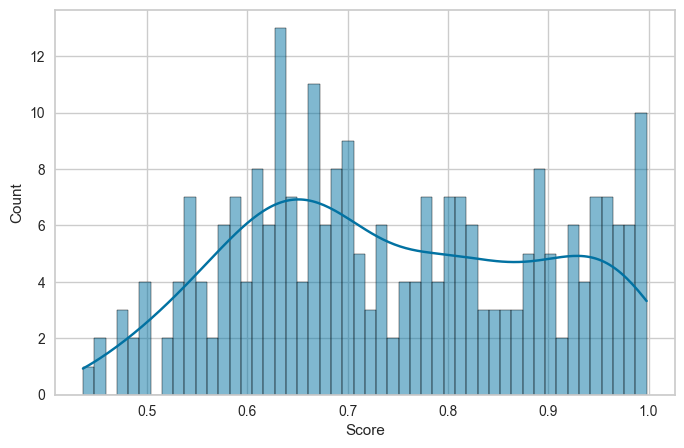

In [25]:
plt.figure(figsize = (8,5))
sns.histplot(x = Calidad.get_details('Column Pair Trends')["Score"], kde = True, bins = 50)

>Podemos observar que hay muchas puntuaciones que son menores de 0.5 y muchas entre 0.6 y 0.8. Muchas columnas no son muy parecidas a las reales.

**Ahora vamos a ver cuanto se parecen las gráficas de densidad de los datos sintéticos y los reales.**

In [26]:
get_column_plot(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    column_name=DataPrincipal.columns[10],
    metadata=Metadata
).show("vscode")

>Muchas veces la gráfica de densidad de los datos sintéticos no está completa debido a que no ha generado datos para un dato concreto de números, si aumentáramos las muestras sintéticas a crear esto no pasaría.
>
>Vemos que las gráficas de densidad de los datos sintéticos se pueden acercar a las de los datos reales, pero hay muchos campos en el que las gráficas de densidad no tienen nada que ver.

In [27]:
synthesizer.get_loss_values_plot().show("vscode")

>Por lo que se ve el modelo no ha tenido suficiente tiempo como para aprender adecuadamente ya que la función de coste del generador no tiende a 0.

**Ahora vamos a comparar los datos sintéticos con los datos reales teniendo en cuenta las relaciones entre 3 campos consecutivos.**

In [28]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], DataSintetico.iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

### Gaussian Copula Synthesizer

In [29]:
# synthesizer = GaussianCopulaSynthesizer(Metadata)
# synthesizer.fit(DataPrincipal)

In [30]:
# Guardar(synthesizer, "GaussianCopulaSynthesizer")
synthesizer = Abrir("GaussianCopulaSynthesizer")

In [31]:
DataSintetico = synthesizer.sample(num_rows=150)
Diagnostico = run_diagnostic(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    metadata=Metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 24/24 [00:00<00:00, 1997.84it/s]|
Data Validity Score: 99.92%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 500.39it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.96%



In [32]:
Calidad = evaluate_quality(
    DataPrincipal,
    DataSintetico,
    Metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 2372.74it/s]|
Column Shapes Score: 86.93%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:01<00:00, 231.02it/s]|
Column Pair Trends Score: 94.48%

Overall Score (Average): 90.71%



In [33]:
get_column_plot(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    column_name=DataPrincipal.columns[10],
    metadata=Metadata
).show("vscode")

In [34]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], DataSintetico.iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

### TVAE Synthesizer

In [35]:
# synthesizer = TVAESynthesizer(Metadata, verbose = True)
# synthesizer.fit(DataPrincipal)

In [36]:
# Guardar(synthesizer, "TVAESynthesizer")
synthesizer = Abrir("TVAESynthesizer")

In [37]:
DataSintetico = synthesizer.sample(num_rows=150)
Diagnostico = run_diagnostic(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    metadata=Metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 24/24 [00:00<00:00, 2181.65it/s]|
Data Validity Score: 99.89%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 502.49it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.94%



In [38]:
Calidad = evaluate_quality(
    DataPrincipal,
    DataSintetico,
    Metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 2391.90it/s]|
Column Shapes Score: 81.14%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:01<00:00, 236.97it/s]|
Column Pair Trends Score: 81.76%

Overall Score (Average): 81.45%



In [39]:
get_column_plot(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    column_name=DataPrincipal.columns[10],
    metadata=Metadata
).show("vscode")

In [40]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], DataSintetico.iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

### Copula GAN Synthesizer

In [41]:
# synthesizer = CopulaGANSynthesizer(Metadata, verbose = True)
# synthesizer.fit(DataPrincipal)

In [42]:
# Guardar(synthesizer, "CopulaGANSynthesizer")
synthesizer = Abrir("CopulaGANSynthesizer")

In [43]:
DataSintetico = synthesizer.sample(num_rows=150)
Diagnostico = run_diagnostic(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    metadata=Metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 24/24 [00:00<00:00, 1842.84it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 499.74it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [44]:
Calidad = evaluate_quality(
    DataPrincipal,
    DataSintetico,
    Metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 1997.09it/s]|
Column Shapes Score: 66.32%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:01<00:00, 167.21it/s]|
Column Pair Trends Score: 73.54%

Overall Score (Average): 69.93%



In [45]:
get_column_plot(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    column_name=DataPrincipal.columns[10],
    metadata=Metadata
).show("vscode")

In [46]:
synthesizer.get_loss_values_plot().show("vscode")

In [47]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], DataSintetico.iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

>Hemos visto que el modelo que puede funcionar mejor para nuestros datos es GaussianCopulaSynthesizer así que vamos a ver cuánto puede mejorar.

>Podemos ver que aunque en algunos campos los datos reales y sintéticos mantienen las relaciones entre los otros campos, en otros es completamente distinto y mejorable.
<!-- 
**Lo que vamos a hacer va a ser una hiperparametricación sobre el algoritmo para crear datos sintéticos para ver qué valores son los óptimos para conseguir unos datos sintéticos más fiables y cercanos a los reales. Vamos a comenzar por aumentar las épocas de entrenamiento del modelo ya al aumentarlo nunca va a empeorar el modelo pero veremos que llega un punto en el que la mejora no es algo significativo así que intentaremos encontrar el parámetro que tenga mejor relación calidad-tiempo**

**El objeto synthesizer tiene por defecto asignadas 300 épocas que va a realizar asi que los valores que probemos van a ser mayores que 300** -->


### MejorModelo

In [48]:
len(DataPrincipal[DataPrincipal["status"] == 1])-len(DataPrincipal[DataPrincipal["status"] == 0])

72

In [49]:
# synthesizer = GaussianCopulaSynthesizer(Metadata)
# synthesizer.fit(DataPrincipal)

In [50]:
# Guardar(synthesizer, "MejorModelo")
synthesizer = Abrir("MejorModelo")

In [51]:
DataSintetico = synthesizer.sample(num_rows=400)
Diagnostico = run_diagnostic(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    metadata=Metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 24/24 [00:00<00:00, 1999.83it/s]|
Data Validity Score: 99.85%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 332.85it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.93%



In [52]:
Calidad = evaluate_quality(
    DataPrincipal,
    DataSintetico,
    Metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 1333.31it/s]|
Column Shapes Score: 87.73%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:01<00:00, 164.80it/s]|
Column Pair Trends Score: 95.07%

Overall Score (Average): 91.4%



In [53]:
get_column_plot(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    column_name=DataPrincipal.columns[10],
    metadata=Metadata
).show("vscode")

In [54]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], DataSintetico.iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

## Hiperparametricación de las épocas

In [55]:
# MejorNEpocas = []
# Epocas = [x for x in range(500,7000,250)]
# Iteracion = 1
# try:
#   for i in Epocas:
#     Inicio = monotonic()
#     Synthesizer = GaussianCopulaSynthesizer(Metadata, epochs = i)
#     print("Entrenando modelo / ", end = "")
#     Synthesizer.fit(DataPrincipal)
#     Final = monotonic()
#     DataSintetico = Synthesizer.sample(num_rows=150)
#     Diagnostico = run_diagnostic(
#       DataPrincipal,
#       DataSintetico,
#       Metadata,
#       False
#     )
#     if Diagnostico.get_score() !=1: #Si los datos tienen algún fallo queremos que siga con la siguiente iteración.
#       continue
#     Calidad = evaluate_quality(
#       DataPrincipal,
#       DataSintetico,
#       Metadata,
#       False
#     )
#     print("Iteración nº" + str(Iteracion) + "=", "Tiempo:", str(Final - Inicio) + ",", "Puntuación:", Calidad.get_score())
#     MejorNEpocas.append([Synthesizer, Final - Inicio, Calidad.get_score()])
#     Iteracion += 1
# except:
#   print("Ha fallado en el intento nº" + str(Iteracion))
#   Guardar(MejorNEpocas, "MejorNEpocas") #Si ocurre algún fallo queremos que guarde la lista igualmente.
    

**Guardamos la variable por si ocurre un error en tiempo de ejecución más adelante, no tener que volver a ejecutar el bucle anterior. Para ello vamos a crear una función para hacerlo de una manera más cómoda.**

In [56]:
# Guardar(MejorNEpocas, "MejorNEpocas")

In [57]:
# MejorNEpocas = Abrir("MejorNEpocas")

In [58]:
# list(map(lambda x: x[0].epochs, sorted(MejorNEpocas, key = lambda x: x[-1])))

Vemos que por lo general cuantas más épocas mejor puntuación tiene el modelo hasta cierto punto

In [59]:
# list(map(lambda x: x[-1], sorted(MejorNEpocas, key = lambda x: x[-1])))

In [60]:
# ListaEpocas = pd.DataFrame(list(map(lambda x: x[-1], sorted(MejorNEpocas, key = lambda x: x[-1]))),
#              index = list(map(lambda x: x[0].epochs, sorted(MejorNEpocas, key = lambda x: x[-1]))),
#              columns = ["Puntuación"])

In [61]:
# sns.lineplot(ListaEpocas)

>Vemos que a partir de las 4000 épocas ya no mejora la puntuación así que ya sabemos alrededor de cuántas épocas puede necesitar el modelo para entrenar.

In [62]:
# sorted(MejorNEpocas, key = lambda x: x[-1], reverse = True)[0][0].get_loss_values_plot().show("vscode")

## Modificación de los datos principales con los datos sintéticos

In [63]:
len(DataSintetico[DataSintetico["status"] == 0])

111

<!-- **Vamos a ver la mejora que han tenido estos datos.** -->

In [64]:
len(DataPrincipal[DataPrincipal["status"] == 1])-len(DataPrincipal[DataPrincipal["status"] == 0])

72

In [65]:
DataDef = pd.concat([DataPrincipal, DataSintetico[DataSintetico["status"] == 0].sample(72)], axis = 0)

In [66]:
DataDef.reset_index(drop = True, inplace = True)

In [67]:
print("Número de pacientes con Parkinson:", DataDef[DataDef["status"] == 1]["status"].count())
print("Número de pacientes sin Parkinson:", DataDef[DataDef["status"] == 0]["status"].count())

Número de pacientes con Parkinson: 120
Número de pacientes sin Parkinson: 120


<Figure size 800x500 with 0 Axes>

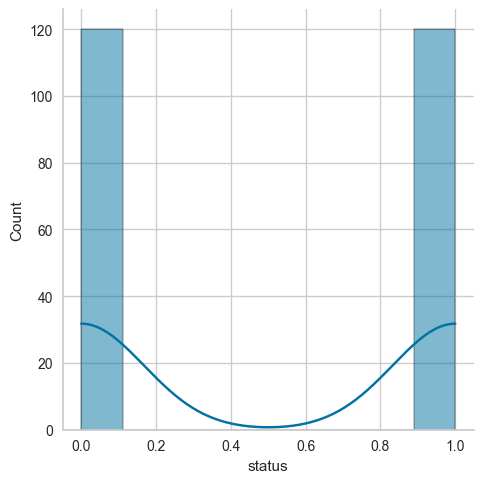

In [68]:
plt.figure(figsize = (8,5))
sns.displot(x = DataDef["status"], kde = True)

In [45]:
# MejoresParametros = Abrir("MejoresParametros")

In [43]:
# ArquitecturasRN = ((32,64,128,256,256,128,64,32),
#                    (64,128,256,256,128,64),
#                    (256,256,128,64,32),
#                    (128,128,32),
#                    (32,128,512,128,32),
#                    (32,64,32),
#                    (256,512,256),
#                    (256,512,256,32))

In [ ]:
# Params = Hiper(Principal = DataPrincipal,
#                Meta = Metadata,
#                RangoEpocas = range(2000, 6001, 250),
#                RangoBatchSize = range(42, 169, 42),
#                RangoDiscriminatorDim = ArquitecturasRN,
#                RangoDiscriminatorDecay = (1e-3, 1e-4, 1e-5, 1e-6),
#                RangoDiscriminatorLR = (2e-2, 2e-3, 2e-4),
#                RangoDiscriminatorSteps = (1, 2, 3, 4),
#                RangoEmbeddingDim = (64, 128, 256, 512),
#                RangoGeneratorDim = ArquitecturasRN,
#                RangoGeneratorDecay = (1e-3, 1e-4, 1e-5, 1e-6),
#                RangoGeneratorLR = (2e-2, 2e-3, 2e-4),
#                RangoPac = (3,6,7,14,21),
#                EarlyStoppingEspera = 20,
#                EarlyStoppingDisminucion = 0.02,
#                Limite = 3000,
#                Lista = MejoresParametros)

Ya tenemos nuestros datos de una manera en la que podemos realizar un análisis.

## Análisis de los datos

In [69]:
DataDef["name"]

0      phon_R01_S01_1
1      phon_R01_S01_2
2      phon_R01_S01_3
3      phon_R01_S01_5
4      phon_R01_S02_1
            ...      
235     sdv-id-lSWHRp
236     sdv-id-otKcFQ
237     sdv-id-vUucKU
238     sdv-id-ioWwFA
239     sdv-id-YUEDWu
Name: name, Length: 240, dtype: object

In [70]:
DataDef[["name", "status"]][:50]

,name,status
0,phon_R01_S01_1,1
1,phon_R01_S01_2,1
2,phon_R01_S01_3,1
3,phon_R01_S01_5,1
4,phon_R01_S02_1,1
5,phon_R01_S02_2,1
6,phon_R01_S02_3,1
7,phon_R01_S02_4,1
8,phon_R01_S02_6,1
9,phon_R01_S04_1,1


> Parece que el número seguido de la S en el campo "name" representa a un sujeto concreto por lo que siempre va a dar el mismo estado(Este campo lo tendrémos que eliminar más tarde para que el modelo no aprenda según el nombre del sujeto).

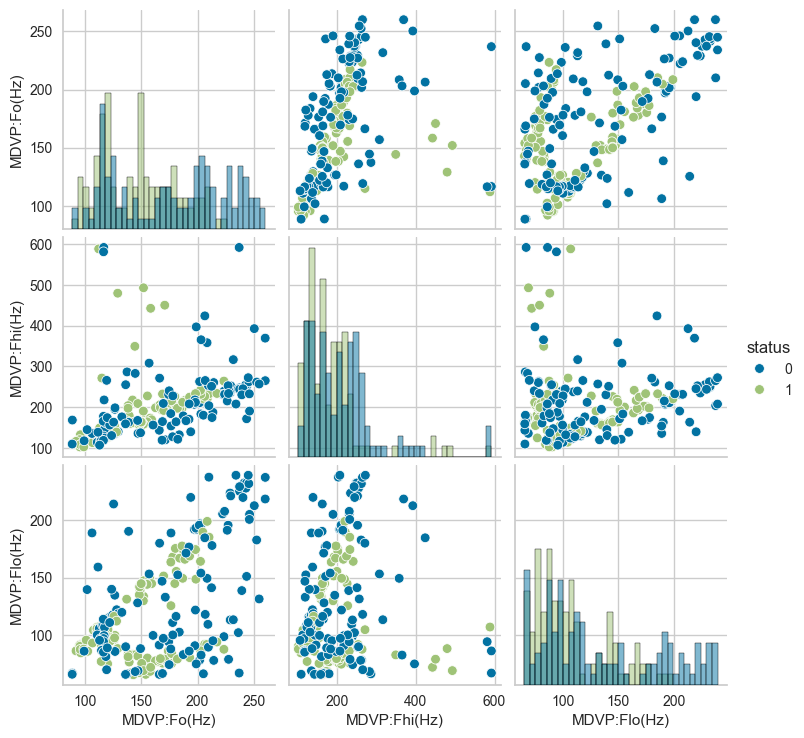

In [71]:
sns.pairplot(pd.concat([DataDef.iloc[:,1:4], DataDef["status"]], axis = 1), hue = "status", diag_kind = "hist", diag_kws = {"bins": 35})

>Las gráficas de dispersión nos muestran poca relación entre los 3 campos de la frecuencia fundamental de la voz y el estado del sujeto ya que ambas dispersiones son similares. También vemos que tienen cierta relación unos con otros de manera lineal.
>
>Si nos fijamos en el histograma de Flo(Hz) vemos que los sujetos con Parkinson son propensos a tener una frecuencia mínima fundamental de 100Hz pero esta también es la frecuencia mínima fundamental más común de los sujetos sanos aunque el pico de los pacientes con la enfermedad tienen un pico de 200 y el de los pacientes sanos llega alrededor de 140, podemos trabajar algo sobre esta característica para sacar más información. También vemos que los sujetos sin Parkinson pueden tener valores mayores a 200 cuando para los sujetos con Parkinson estos valores no son comunes. Podemos crear un nuevo campo que use a este y a otros que represente una unión de los conjuntos para que pueda dar una mayor información ya que no tiene una relación muy fuerte con el estado del sujeto de manera aislada.
>
>Si nos fijamos en el histograma de Fhi(hz) vemos que tiene nula relación con el estado ya que ambas tienen frecuencias similares en valores parecidos.
>
>Pero si miramos el histograma de Fo(Hz) observamos que tienen los máximos en diferentes rangos de valores y tienen sus máximos en diferentes zonas por lo que hay una diferencia clara en la frecuencia fundamental media vocal de los pacientes con Parkinson y sin él por lo que trabajaremos sobre este campo más adelante para poder obtener la mayor información posible de esta relación.

+ Relación entre los campos: Todos con todos(lineal).
+ Relación con la variable objetivo: MDVP:Flo(Hz) / MDVP:Fo(Hz)
  - Relación MDVP:Flo(Hz)-objetivo:
    * Máximo más alto en sujetos enfermos.
    * Los sujetos sanos llegan a valores más altos.
  - Relación MDVP:Fo(Hz)-objetivo:
    * 1 máximo en común y 2 diferentes entre sujetos sanos y enfermos.
    * Los sujetos sanos llegan a valores más altos.

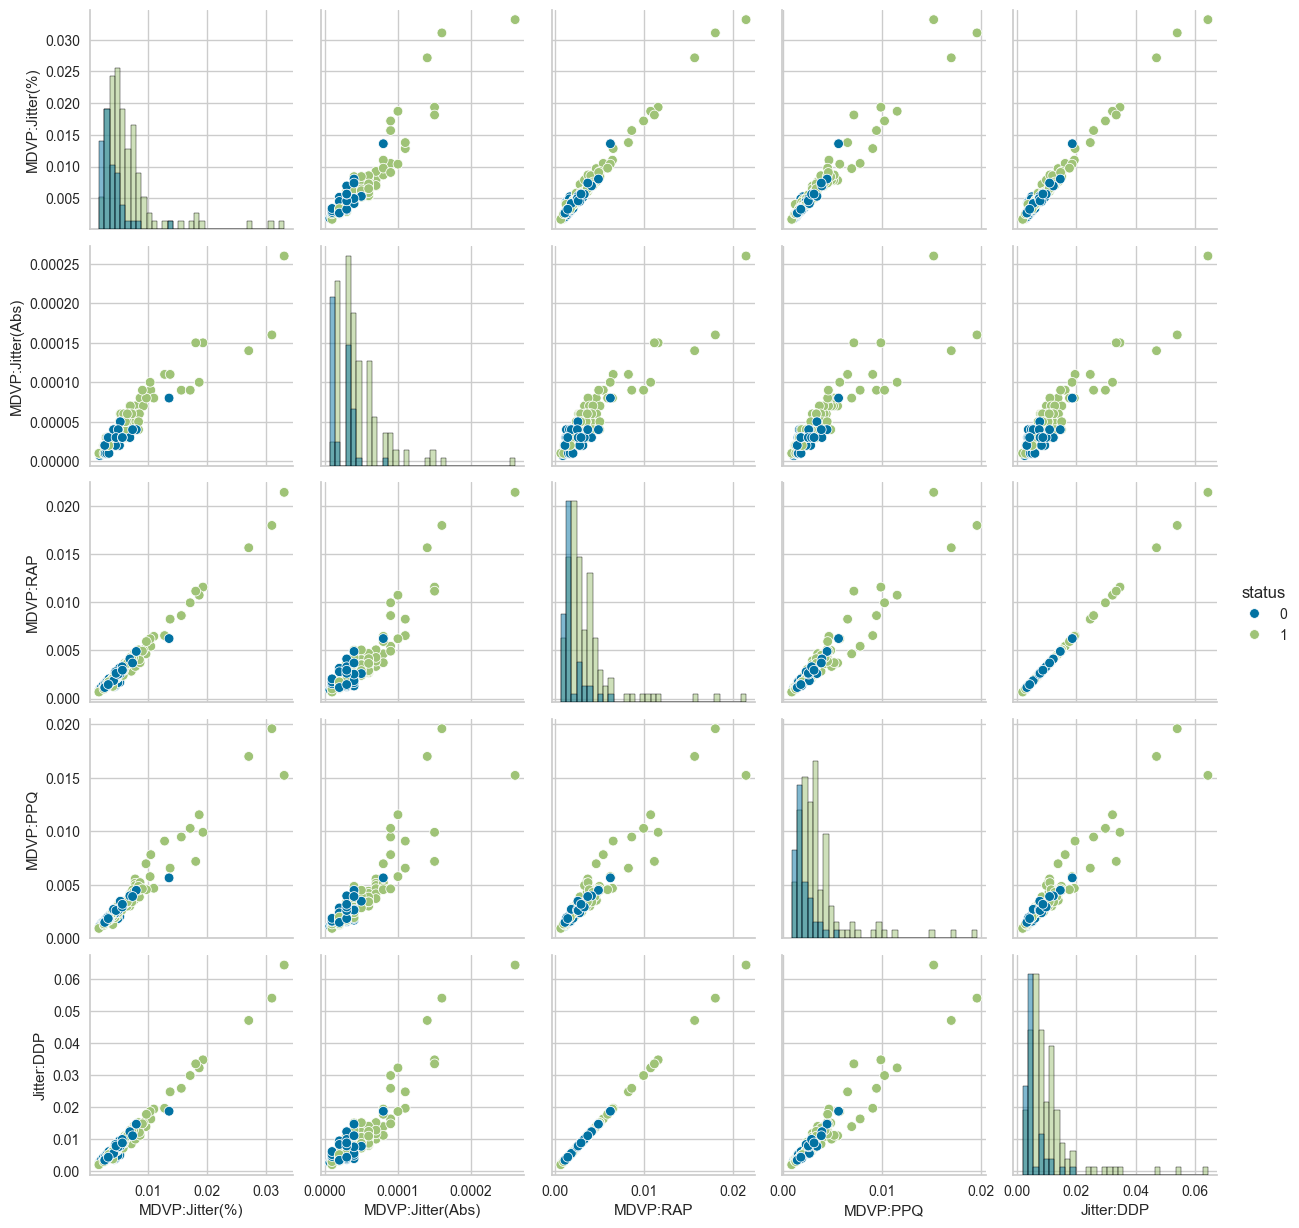

In [72]:
sns.pairplot(pd.concat([DataPrincipal.iloc[:,4:9], DataPrincipal["status"]], axis = 1), hue = "status", diag_kind = "hist", diag_kws = {"bins": 35})

> Podemos observar que los sujetos con parkinson tienden a llegar a valores más altos pero esto seguramente sea debido a que al tener inicialmente pocos datos de sujetos sanos tenían un menor rango de valores que los sujetos enfermos y como al crear los datos sintéticos se intenta mantener el rango que tienen los valores iniciales siguen sin alcanzar los valores a los que llegan los sujetos enfermos, igualmente tendremos en cuenta esta diferencia de valores para que el modelo entrene por si encuentra algúna relación ya que al modelo no le afecta que un campo nuevo no tenga mucha importancia, en cambio, si tiene importancia hará que su precisión aumente. También vemos que las gráficas de densidad ahora no nos muestran diferencias notables en cuando a la altura de los picos ni diferencias en cuanto al valor donde se situan los 2 picos aunque los picos de los sujetos enfermos parecen ser más amplios que la de los sujetos sanos que son muy pronunciados.
>
>También hay bastante relación entre todos los campos.

+ Relación entre los campos: Todos con todos(lineal).
+ Relación con la variable objetivo: MDVP:Jitter(%) / MDVP:Jitter(Abs) / MDVP:RAP / MDVP:PPQ / Jitter:DDP
  - Relación MDVP:Jitter(%)-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación MDVP:Jitter(Abs)-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación MDVP:RAP-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación MDVP:PPQ-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación Jitter:DDP-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.

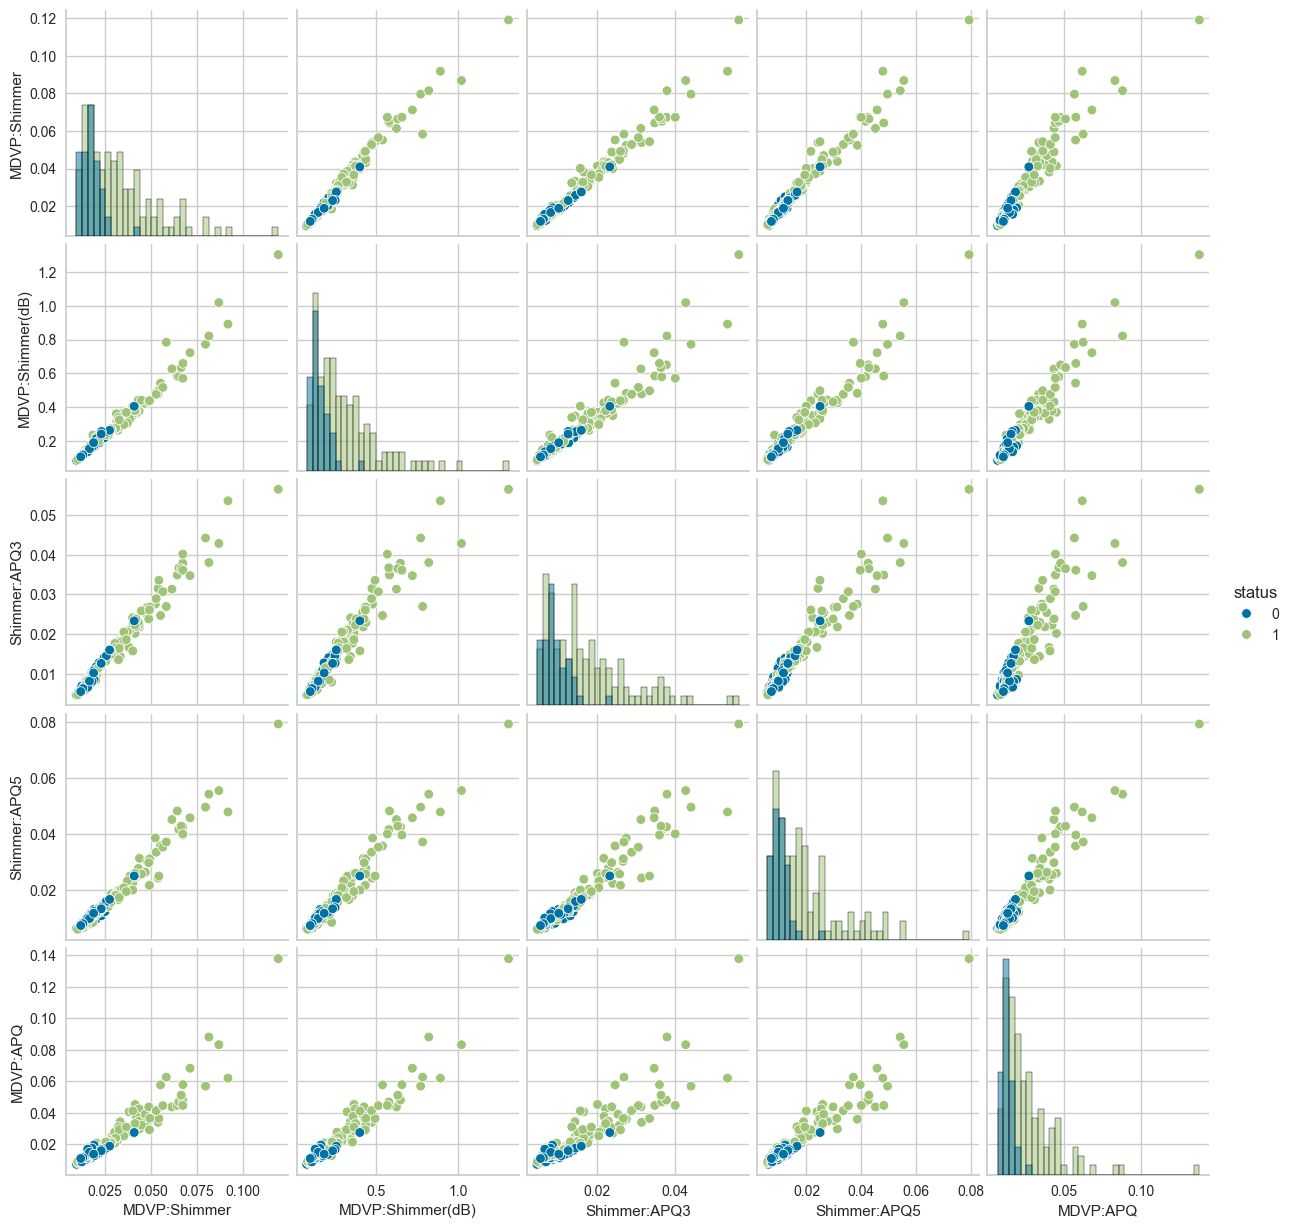

In [73]:
sns.pairplot(pd.concat([DataPrincipal.iloc[:,9:14], DataPrincipal["status"]], axis = 1), hue = "status", diag_kind = "hist", diag_kws = {"bins": 35})

>Observamos que tienen las mismas características que los campos de las gráficas anteriores pero en el caso de los histogramas, los valores atípicos están más diferenciados entre los sujetos sanos y enfermos.

+ Relación entre los campos: Todos con todos(lineal).
+ Relación con la variable objetivo: MDVP:Shimmer / MDVP:Shimmer(dB) / Shimmer:APQ3 / Shimmer:APQ5 / MDVP:APQ
  - Relación MDVP:Shimmer-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación MDVP:Shimmer(dB)-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación Shimmer:APQ3-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación Shimmer:APQ5-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación MDVP:APQ:-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.

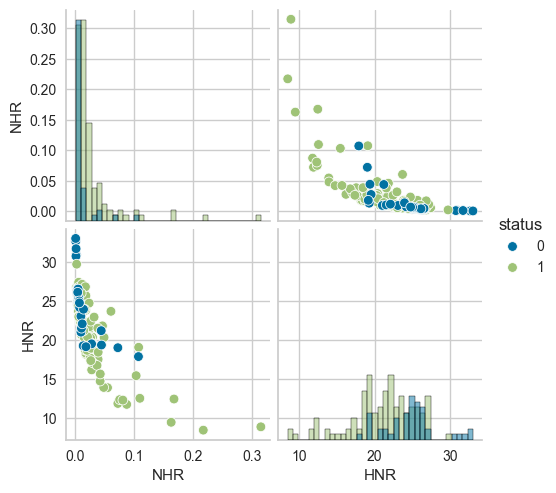

In [74]:
sns.pairplot(pd.concat([DataPrincipal[["NHR", "HNR"]], DataPrincipal["status"]], axis = 1), hue = "status", diag_kind = "hist", diag_kws = {"bins": 35})

>El campo NHR no nos da tanta información. Los histogramas son parecidos a los anteriores pero con diferente forma de pico. Pero el campo HNR sí nos puede servir para identificar características poco comunes. Vemos que hay una relación proporcionalmente inversa entre HNR y NHR y vemos que en el campo HNR los sujetos sanos alcanzan valores más bajos.

+ Relación entre los campos: Todos con todos(inversamente proporcional).
+ Relación con la variable objetivo: NHR / HNR
  - Relación NHR-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación HNR-objetivo:
    * Los sujetos enfermos llegan a valores más bajos.
    * Máximo más amplio en sujetos enfermos.

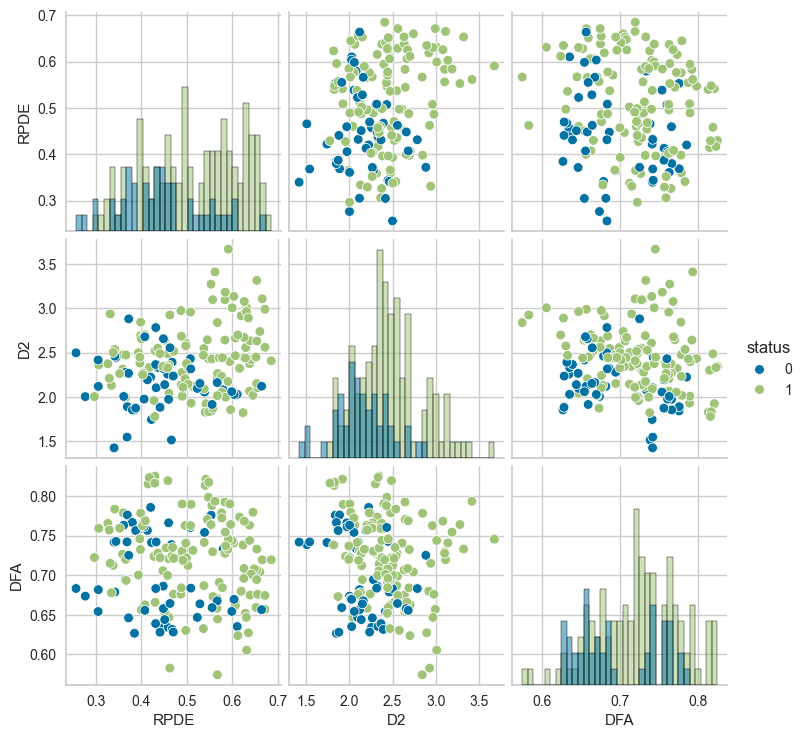

In [75]:
sns.pairplot(pd.concat([DataPrincipal[["RPDE", "D2", "DFA"]], DataPrincipal["status"]], axis = 1), hue = "status", diag_kind = "hist", diag_kws = {"bins": 35})

>El campo RPDE nos puede servir para obtener características comunes de la enfermedad pero no para características no comunes. En cambio los campos D2 y DFA nos puede servir para ambas cosas. Observamos también que no tienen prácticamente ninguna relación ningún campo con el otro.
>
>Si nos fijamos en las gráficas de dispersión que relacionan D2 y RPDE podemos ver que son las únicas que tienen un area en la que hay muchos sujetos con Parkinson y muy pocos sin él, aunque la mayoría del resto de sujetos está muy mezclado, esto nos puede servir para predecir características no comunes de la enfermedad. No podemos decir que estos campos por separado tienen valores diferenciadores entre sujetos sanos y enfermos sino que funcionan como pareja. Estos campos individualmente no nos ayudan a der bien aread diferentes entre sujetos sanos y enfermos como podemos ver en las otras gráficas en las que se relacionan estos campos con DFA.

+ Relación entre los campos: Ninguna.
+ Relación con la variable objetivo: RPDE / DFA / D2
  - Relación RPDE-objetivo:
    * 1 máximo en común y 1 de sujetos enfermos diferente.
  - Relación D2-objetivo:
    * Diferentes máximos.
    * Los sujetos enfermos llegan a valores más altos.
  - Relación DFA-objetivo:
    * Diferentes máximos.
    * Los sujetos enfermos llegan a valores más altos y bajos.
  - Relación (RPDE-D2)-objetivo:
    * Zona identificativa de pacientes enfermos.

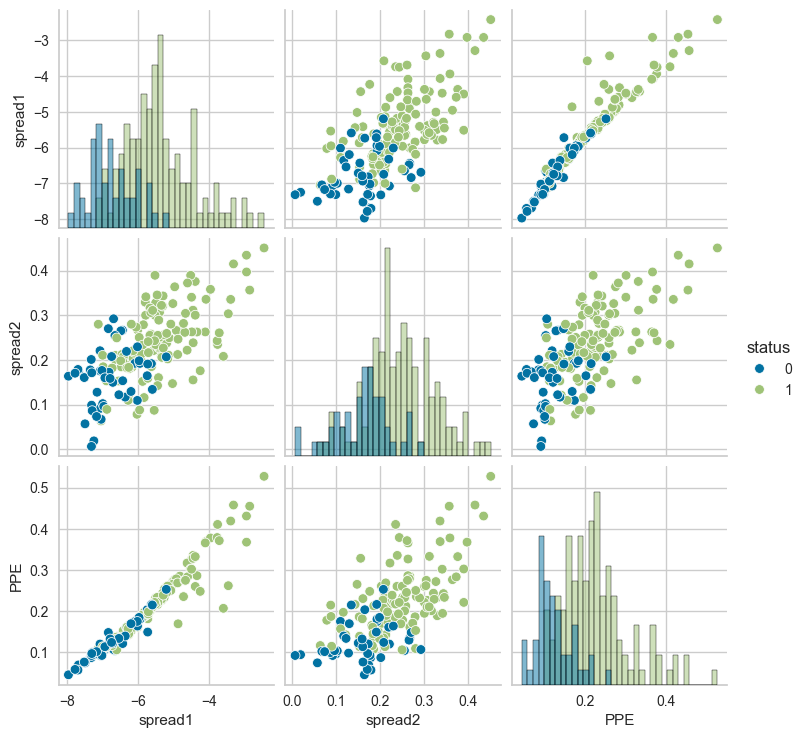

In [133]:
sns.pairplot(pd.concat([DataPrincipal[["spread1","spread2","PPE"]], DataPrincipal["status"]], axis = 1), hue = "status", diag_kind = "hist", diag_kws = {"bins": 35})

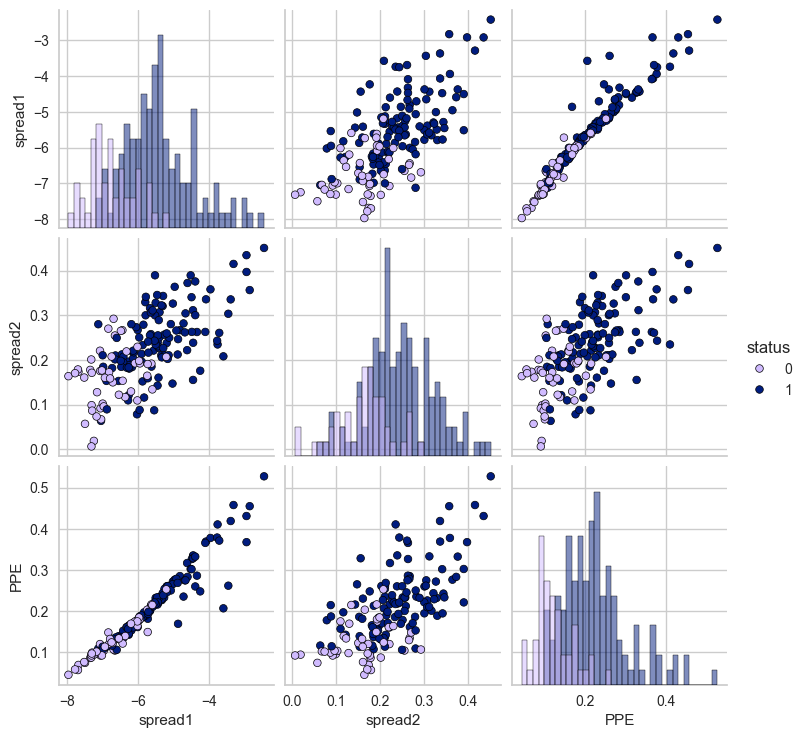

In [170]:
sns.pairplot(data = pd.concat([DataPrincipal[["spread1","spread2","PPE"]],
                        DataPrincipal["status"]], axis = 1),
                hue = "status",
                diag_kind = "hist",
                diag_kws = {"bins": 35},
                plot_kws=dict(s=30, edgecolor="black", linewidth = 0.5),
                palette = [sns.color_palette("pastel")[4], sns.color_palette("dark")[0]])

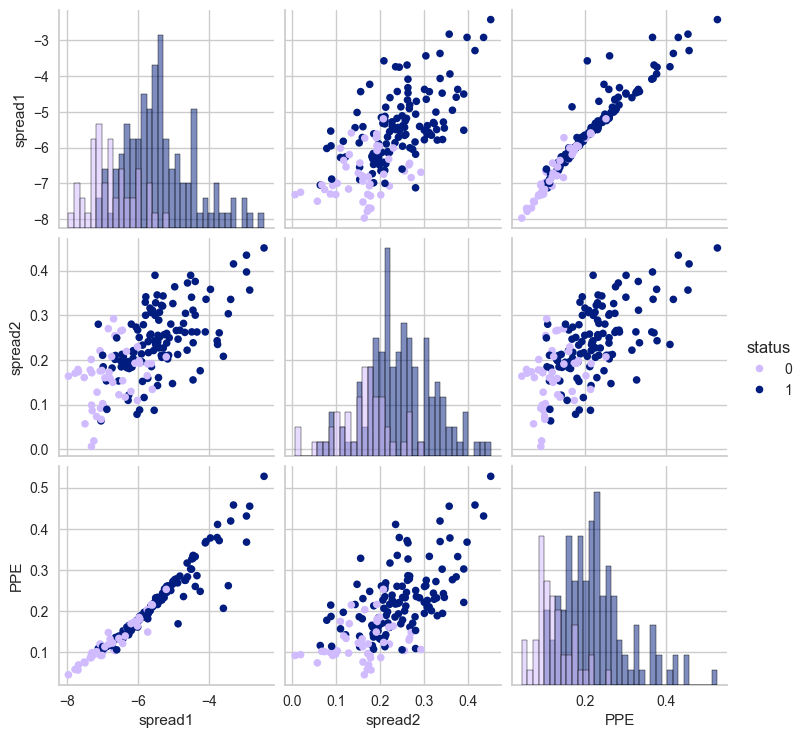

In [175]:
sns.pairplot(data = pd.concat([DataPrincipal[["spread1","spread2","PPE"]],
                        DataPrincipal["status"]], axis = 1),
                hue = "status",
                diag_kind = "hist",
                diag_kws = {"bins": 35},
                plot_kws=dict(s=30, edgecolor="white", linewidth = 0),
                palette = [sns.color_palette("pastel")[4], sns.color_palette("dark")[0]])

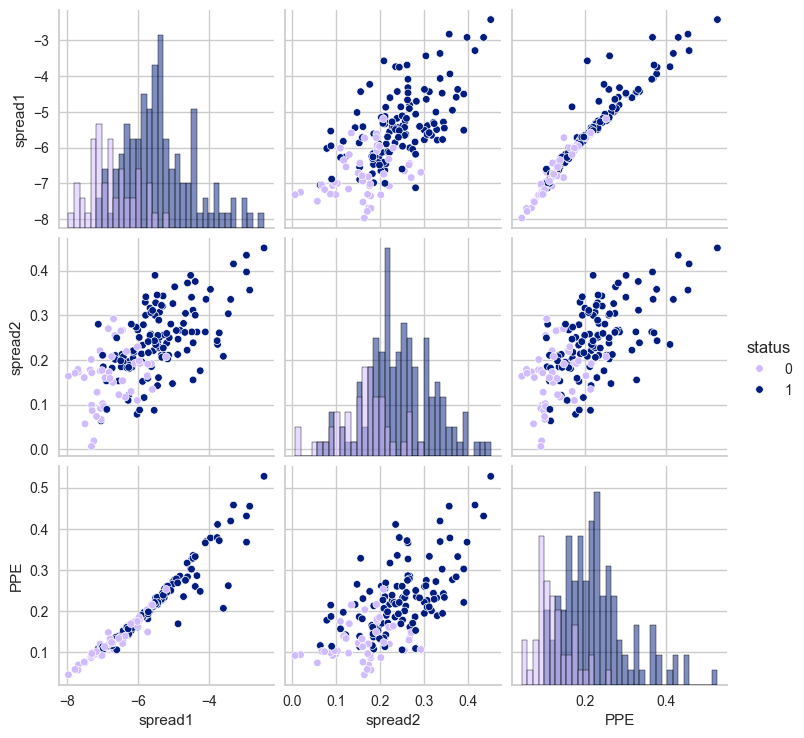

In [176]:
sns.pairplot(data = pd.concat([DataPrincipal[["spread1","spread2","PPE"]],
                        DataPrincipal["status"]], axis = 1),
                hue = "status",
                diag_kind = "hist",
                diag_kws = {"bins": 35},
                plot_kws=dict(s=30, edgecolor="white", linewidth = 0.5),
                palette = [sns.color_palette("pastel")[4], sns.color_palette("dark")[0]])

In [211]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [212]:
sns.color_palette("dark")

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [214]:
import matplotlib

In [215]:
matplotlib.colors.Colormap()

matplotlib.colors.Colormap

In [217]:
a = 2

In [ ]:
sns.histplot()

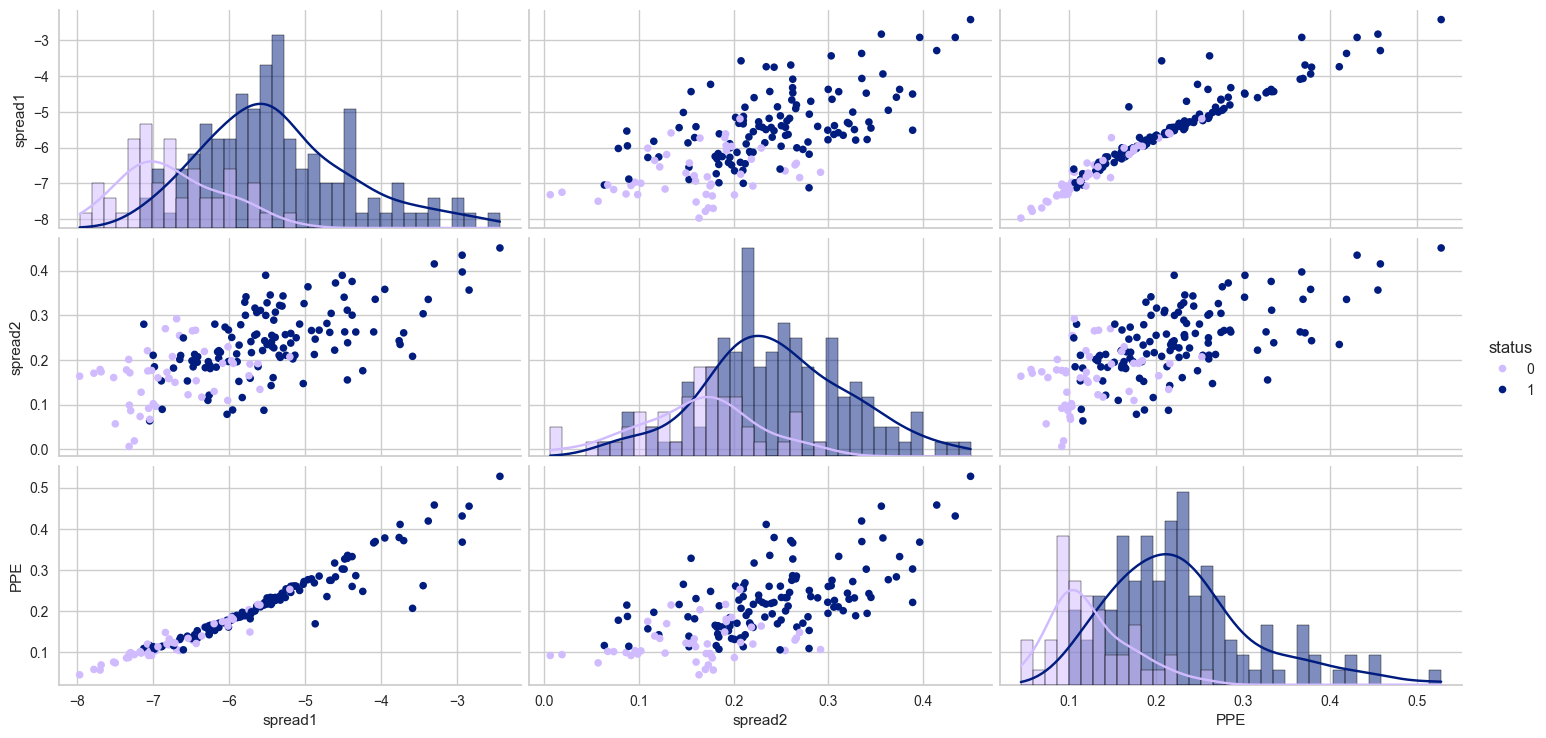

In [222]:
sns.pairplot(data = pd.concat([DataPrincipal[["spread1","spread2","PPE"]], DataPrincipal["status"]], axis = 1),
                hue = "status",
                diag_kind = "hist",
                diag_kws = {"bins": 35, "kde":True},
                aspect = 2,
                plot_kws=dict(s=30, edgecolor="white", linewidth = 0),
                palette = [sns.color_palette("pastel")[4], sns.color_palette("dark")[0]])

>En este caso los campos spread1, spread2 y PPE tienen diferencias en los histogramas en cuanto a los picos entre los pacientes con Parkinson y los que no. Además, podemos ver que están bastante relacionados entre ellos, sobretodo PPE con spread1. Y por último vemos que los pacientes sanos alcanzan valores más bajos que los enfermos pero los enfermos alcanzan valores más altos.

+ Relación entre los campos: Todos con todos(lineal).
+ Relación con la variable objetivo: spread1 / spread2 / PPE
  - Relación spread1-objetivo:
    * Máximos diferentes.
    * Los sujetos enfermos llegan a valores más altos.
    * Los sujetos sanos llegan a valores más bajos
  - Relación spread2-objetivo:
    * Máximos diferentes.
    * Los sujetos enfermos llegan a valores más altos.
    * Los sujetos sanos llegan a valores más bajos
  - Relación PPE-objetivo:
    * Máximos diferentes.
    * Los sujetos enfermos llegan a valores más altos.
    * Los sujetos sanos llegan a valores más bajos

Vemos que todos los campos excepto MDVP:Fhi(Hz)nos pueden dar información importante así que vamos a usarlos todos. Vamos a seguir haciendo análisis sobre los campos

<Axes: >

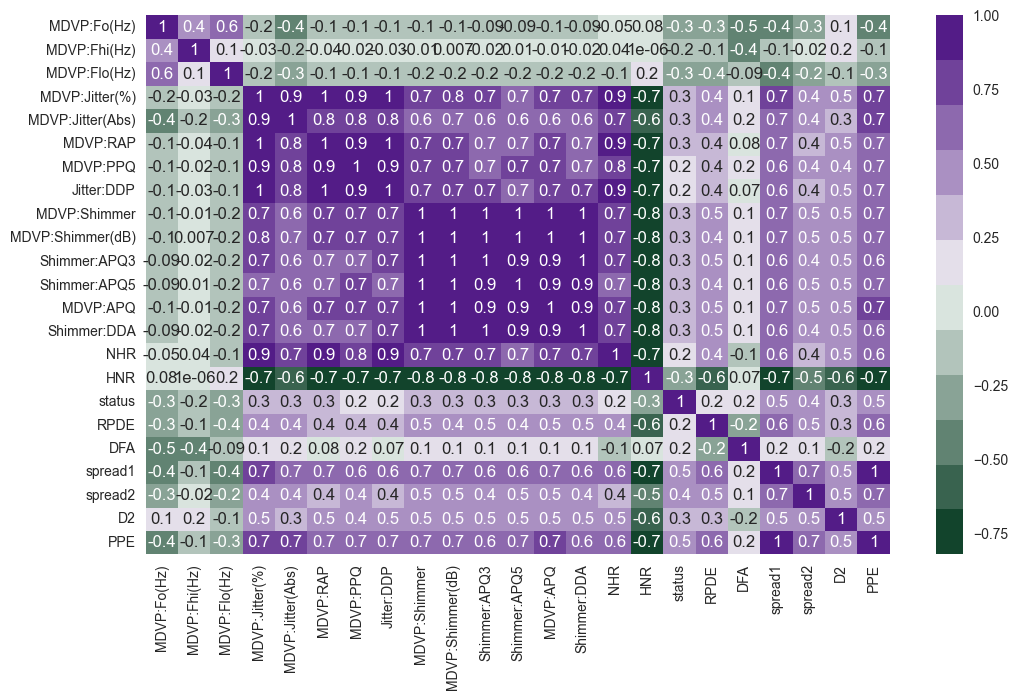

In [128]:
plt.figure(figsize = (12,7))
sns.heatmap(DataDef.iloc[:, 1:].corr(), annot = True, fmt = ".1g", cmap=sns.diverging_palette(145, 280, s=85, l=25, n=12))

No hay muchos campos que tengan una relación demasiado fuerte con la variable objetivo. Los campos que más relación tienen son spread1 y PPE pero vemos sobretodo por el centro campos que tienen mucha relación entre ellos.